In [1]:
import sys, os
sys.path.append(os.path.join('..', 'scripts'))
import figure_utils as utils
import lif_utils

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

 99%|██████████████████████████████████▋| 49479/50000 [00:08<00:00, 6108.13it/s]

Saving to temporal_tuning_grating.large.pdf
Extracting bounding box of file temporal_tuning_grating.large.pdf
Optimising PDF and saving to temporal_tuning_grating.pdf


GPL Ghostscript 9.56.1: Can't embed the complete font LibertinusT1Math as it is too large, embedding a subset.
GPL Ghostscript 9.56.1: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.
GPL Ghostscript 9.56.1: Can't embed the complete font LinBiolinumTB as it is too large, embedding a subset.


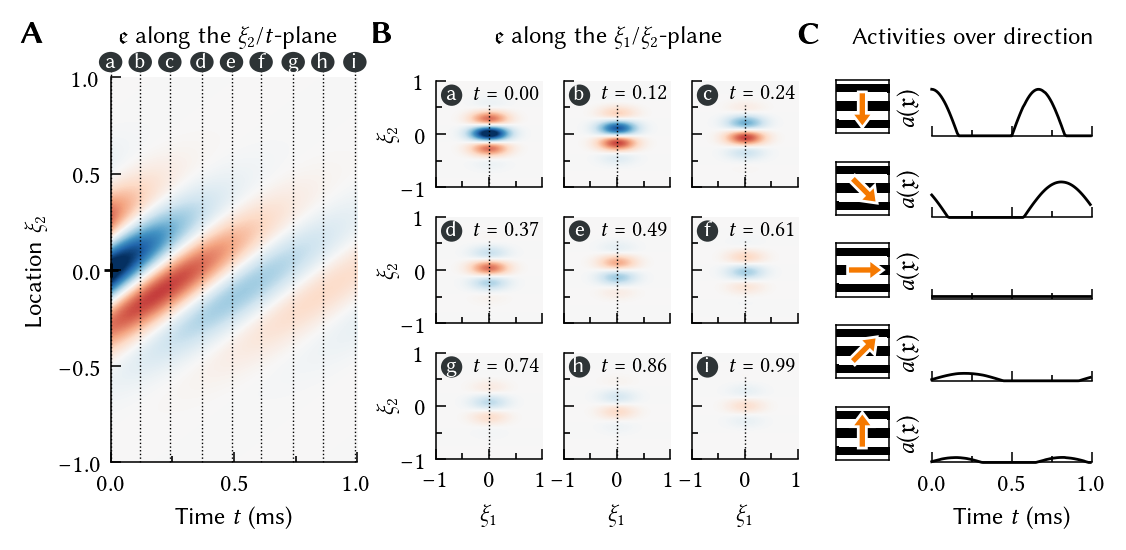

100%|███████████████████████████████████| 50000/50000 [00:19<00:00, 6108.13it/s]

In [3]:
import tqdm

#vs = [0.5, 1.0, 1.5]
vs = [1.0]
vs_styles = [
#    {
#        "color": 'k',
#        "linestyle": (0, (1, 1)),
#        "linewidth": 0.7,
#    },
    {
        "color": 'k',
        "linestyle": '-',
        "linewidth": 1.0,
    },
#    {
#        "color": 'k',
#        "linestyle": '--',
#        "linewidth": 0.7,
#    },
]

def gabor(x, y, f=1.5, sigma=0.25, theta=np.pi / 2, psi=0.0, x0=0.0, y0=0.0):
    xp = np.cos(theta) * x + np.sin(theta) * y - x0
    yp = -np.sin(theta) * x + np.cos(theta) * y - y0
    E = np.exp(-(np.square(xp) + np.square(yp)) / (2.0 * np.square(sigma)))
    S = np.cos(2.0 * np.pi * f * xp - psi)
    return E * S


def grate(x, y, f=1.5, theta=np.pi / 2, psi=0.0, x0=0.0, y0=0.0):
    xp = np.cos(theta) * x + np.sin(theta) * y - x0
    yp = -np.sin(theta) * x + np.cos(theta) * y - y0
    S = np.cos(2.0 * np.pi * f * xp - psi)
    return 2.0 * (S >= 0.0) - 1.0


xs, ys = np.linspace(-1, 1, 101), np.linspace(-1, 1, 101)
xss, yss = np.meshgrid(xs, ys)
dt = 1e-2
T = 1.0
ts = np.arange(0, T, dt)
tau = 0.5

E = np.zeros((len(ts), len(xs), len(ys)))
for i, t in enumerate(ts):
    E[i] = gabor(xss, yss, f=1.5, psi=3.0 * np.pi * t) * np.exp(-t / tau)
E_norm = np.linalg.norm(E.reshape(E.shape[0], -1), axis=1)
E = E / (np.sum(E_norm) * dt)

E_norm = np.linalg.norm(E.reshape(E.shape[0], -1), axis=1)

fig = plt.figure(figsize=(6.25, 2.5),)
gs1 = fig.add_gridspec(1,
                       3,
                       left=0.10,
                       right=0.90,
                       wspace=0.4,
                       width_ratios=[1, 1.2, 1])
gs2 = fig.add_gridspec(3, 3, left=0.36, right=0.65, wspace=0.2, hspace=0.2)
gs3 = fig.add_gridspec(5,
                       2,
                       left=0.68,
                       right=0.885,
                       wspace=0.4,
                       hspace=0.4,
                       width_ratios=[1, 3])

ax1 = fig.add_subplot(gs1[0, 0])

#for iv, (v, v_style) in enumerate(zip(vs, vs_styles)):
#    x0, y0 = 0.0, 0.0
#    if v >= 1.0:
#        x1, y1 = 1 / v, 1
#    else:
#        x1, y1 = 1, v
#    ax1.plot([x0, x1], [y0, y1], **v_style, zorder=2)
#    ax1.plot(x1, y1, '+', color='k', markersize=5, clip_on=False, zorder=2)

ax1.plot([0], [0], '+', color='k', markersize=5, clip_on=False, zorder=10)

ax1.set_xlim(0, T)
ax1.set_xticks(np.linspace(0, 1, 5), minor=True)
ax1.set_ylim(-1, 1)

ax1.imshow(E[:, :, 51].T,
           vmin=-0.125,
           vmax=0.125,
           cmap='RdBu',
           extent=[0, T, -1, 1],
           interpolation='bilinear',
           origin='lower')
ax1.set_aspect('auto')

ax1.set_xlabel("Time $t$ (ms)")
ax1.set_ylabel("Location $\\xi_2$")

axs = np.array([[fig.add_subplot(gs2[i, j]) for j in range(3)]
                for i in range(3)])
for i, (t, ax) in enumerate(
        zip(np.linspace(0, len(ts) - 1, axs.size, dtype=int), axs.flat)):
    ax.imshow(E[t],
              vmin=-0.125,
              vmax=0.125,
              cmap='RdBu',
              interpolation='bilinear',
              origin='lower',
              extent=[-1, 1, -1, 1])
    i0, j0 = i // 3, i % 3
    if j0 == 0:
        ax.set_ylabel("$\\xi_2$", labelpad=0.5)
    else:
        ax.set_yticklabels([])
    if i0 == 2:
        ax.set_xlabel("$\\xi_1$")
    else:
        ax.set_xticklabels([])
    ax.set_xticks(np.linspace(-1, 1, 5), minor=True)
    ax.set_yticks(np.linspace(-1, 1, 5), minor=True)

    ax.plot([0, 0], [-1.0, 0.55], 'k:', linewidth=0.5)

    ax.text(0.15,
            0.825,
            chr(ord('a') + i),
            color='white',
            size=8,
            va="baseline",
            ha="center",
            transform=ax.transAxes)
    ax.text(1.0,
            0.825,
            f"$t = {ts[t]:0.2f}$",
            color='k',
            size=8,
            va="baseline",
            ha="right",
            transform=ax.transAxes)
    c = mpl.patches.Circle((0.15, 0.865),
                           0.1,
                           facecolor=utils.grays[0],
                           linewidth=0.0,
                           transform=ax.transAxes)
    ax.add_artist(c)

    ax1.plot([ts[t], ts[t]], [-1, 1.1], 'k:', linewidth=0.5, zorder=1, clip_on=False)
    x = ts[t] / T
    ax1.text(x,
             1.028,
             chr(ord('a') + i),
             color='white',
             size=8,
             va="baseline",
             ha="center",
             transform=ax1.transAxes,
             clip_on=False,
             zorder=11)
    c = mpl.patches.Ellipse((x, 1.04),
                            0.095,
                            0.053,
                            facecolor=utils.grays[0],
                            linewidth=0.0,
                            transform=ax1.transAxes,
                            clip_on=False,
                            zorder=10)
    ax1.add_artist(c)

axs = np.array([[fig.add_subplot(gs3[i, j]) for j in range(2)]
                for i in range(5)])

pbar = tqdm.tqdm(total=5 * len(vs) * len(ts) * len(ts))
for i in range(5):
    axs[i, 0].set_xticks([])
    axs[i, 0].set_yticks([])
    axs[i, 0].imshow(grate(xss, yss),
                     cmap='Greys',
                     interpolation='none',
                     extent=[-1, 1, -1, 1],
                     origin='lower')

    alphas = np.linspace(-np.pi / 2, np.pi / 2, 5)[i]
    dirx, diry = np.cos(alphas), np.sin(alphas)

    for spine in ["left", "right", "top", "bottom"]:
        axs[i, 0].spines[spine].set_visible(True)

    axs[i, 0].arrow(-0.5 * dirx,
                    -0.5 * diry,
                    1.6 * 0.5 * dirx,
                    1.6 * 0.5 * diry,
                    linewidth=2.0,
                    width=0.2,
                    head_width=0.6,
                    head_length=0.4,
                    color='white')
    axs[i, 0].arrow(-0.5 * dirx,
                    -0.5 * diry,
                    1.6 * 0.5 * dirx,
                    1.6 * 0.5 * diry,
                    linewidth=0.0,
                    width=0.2,
                    head_width=0.6,
                    head_length=0.4,
                    color=utils.oranges[1])

    axs[i, 1].set_yticks([])
    axs[i, 1].spines["left"].set_visible(False)
    if i < 4:
        axs[i, 1].set_xticklabels([])
    else:
        axs[i, 1].set_xlabel("Time $t$ (ms)")

    # Compute the convolution
    for iv, v in enumerate(vs):
        cs = np.zeros_like(ts)
        for t0, t in enumerate(ts):
            for t1, tau in enumerate(ts):
                G = grate(xss,
                          yss,
                          x0=v * (t - tau) * diry,
                          y0=v * (t - tau) * dirx)
                cs[t0] += np.inner(G.flatten(), E[t1].flatten()) * dt

                pbar.update(1)

        axs[i, 1].plot(ts, np.clip(cs, 0, None), clip_on=False, **vs_styles[iv])
    axs[i, 1].set_xlim(0, T)
    axs[i, 1].set_ylim(0, 50)
    axs[i, 1].set_ylabel("$a(\\mathfrak{x})$")
    axs[i, 1].set_xticks(np.linspace(0, 1, 5), minor=True)

fig.text(0.0275, 0.95, '\\textbf{A}', size=12, va="baseline", ha="left")
fig.text(0.195, 0.95, "$\\mathfrak{e}$ along the $\\xi_2$/$t$-plane", va="baseline", ha="center")

fig.text(0.31, 0.95, '\\textbf{B}', size=12, va="baseline", ha="left")
fig.text(0.5, 0.95, "$\\mathfrak{e}$ along the $\\xi_1$/$\\xi_2$-plane", va="baseline", ha="center")

fig.text(0.65, 0.95, '\\textbf{C}', size=12, va="baseline", ha="left")
fig.text(0.79, 0.95, "Activities over direction", va="baseline", ha="center")

utils.save(fig, "temporal_tuning_grating.pdf")
